In [6]:
import numpy as np
import cv2
import os
import shutil 
import time
import matplotlib.pyplot as plt
% matplotlib inline

In [7]:
path = '/home/icl/chenxin/onekeyGeonet/Sub_Geonet_test/'
instances = os.listdir(path+'subTest')
exist_segs = os.listdir(path+'seg')
gt = '/home/icl/chenxin/FCIS/data/ObjectSnap/Refine/seg/'

In [8]:
os.mkdir(path + 'error')
os.mkdir(path + 'seg')

FileExistsError: [Errno 17] File exists: '/home/icl/chenxin/onekeyGeonet/Sub_Geonet_test/error'

In [9]:
def parsename(name):
    #name = 'bod111_0_20_0_255.png'
    blue = name[name.rindex('_')+1:name.rindex('.')]
    #print blue
    temp = name[:name.rindex('_')]
    #print temp
    green = temp[temp.rindex('_')+1:]
    #print green
    temp = name[:temp.rindex('_')]
    #print temp
    red = temp[temp.rindex('_')+1:]
    #print red
    realname = name[:temp.rindex('_')]
    #print realname
    return int(red),int(green),int(blue),realname

In [10]:
def ClassifyColor(Red,Green,Blue):
    if Blue == 255:
        if Green == 0 and Red % 10 == 0 and Red != 0:
            return 'CubeBody'
        elif Red % 10 == 0 and Green == Red and Red != 0:
            return 'CubeFace'
    elif Blue == 200:
        if Green == 0 and Red % 10 == 0 and Red != 0:
            return 'CylinderBody'
        elif Red % 10 == 0 and Green == Red and Red != 0:
            return 'CylinderFace'
    elif Blue == 150:
        if Green == 0 and Red % 10 == 0 and Red != 0:
#             return 'Grip'
              return 'CylinderBody'
    else:
        if Red == 0 and Green == 0 and Blue == 0:
            return 'Background'
    return 'Invalid'

In [11]:
def ParseMask(img):
    t0 = time.time()
    part = []
    partlabel = []
    visited_color = []
    
    blue_channel = img[:,:,0]
    pixel = blue_channel.nonzero()
    for i in range(0,len(pixel[0])):
        color = img[pixel[0][i],pixel[1][i]]
        color_string =  str("%03d" % color[0]) + str("%03d" % color[1]) +str("%03d" % color[2])
        if color_string not in visited_color: 
            visited_color.append(color_string)
            label = ClassifyColor(color[2],color[1],color[0])
            if label!= 'Background' and label!='Invalid':
                lower = np.array(color, dtype = "uint8")#颜色下限  
                upper = np.array(color, dtype = "uint8")#颜色上限  

                #plt.imshow(fcis_img)
                mask = cv2.inRange(img, lower, upper) 
                output = cv2.bitwise_and(img,img,mask=mask)
                output = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
                output[output>=1] = 1

                part.append(output)
                partlabel.append(label)
    
    return part, partlabel

In [12]:
def mask_overlap(mask11, mask22):
###############################################
###############################################
    """
    This function calculate region IOU when masks are
    inside different boxes
    Returns:
        intersection over unions of this two masks
    """
    mask1 = mask11.copy()
    mask2 = mask22.copy()
    
    mask1[mask1>=1] = 1
    mask2[mask2>=1] = 1
    
    plt.subplot(1,2,1) 
    plt.imshow(mask1)
    plt.subplot(1,2,2) 
    plt.imshow(mask2)
    
    green = (255,255,255)
    #box1 / box2 are the bounding box of mask1 / mask2 
    blob1 = np.where(mask1>=1)
    box1x1 = min(blob1[1])
    box1x2 = max(blob1[1])
    box1y1 = min(blob1[0])
    box1y2 = max(blob1[0])
    
    #cv2.rectangle(mask1,(box1x1,box1y1),(box1x2,box1y2),0.5,1)
    
    #plt.subplot(1,2,1) 
    #plt.imshow(mask1)
    #plt.subplot(1,2,2) 
    #plt.imshow(mask2)
    
    #print box1x1,box1x2,box1y1,box1y2
    
    blob2 = np.where(mask2>=1)
    box2x1 = min(blob2[1])
    box2x2 = max(blob2[1])
    box2y1 = min(blob2[0])
    box2y2 = max(blob2[0])
    
    #cv2.rectangle(mask2,(box2x1,box2y1),(box2x2,box2y2),0.5,1)
    
    x1 = max(box1x1 , box2x1)
    y1 = max(box1y1 , box2y1)
    x2 = min(box1x2 , box2x2)
    y2 = min(box1y2 , box2y2)

    #######################
    
    if x1 > x2 or y1 > y2:
        return 0
    w = x2 - x1 + 1
    h = y2 - y1 + 1
    # get masks in the intersection part
    inter_maska = mask1[y1: y1 + h, x1:x1 + w]
    inter_maskb = mask2[y1: y1 + h, x1:x1 + w]

    #print inter_maska
    #print inter_maskb
    
    #plt.subplot(2,2,1) 
    #plt.imshow(inter_maska)
    #plt.subplot(2,2,2) 
    #plt.imshow(inter_maskb)    
    
    assert inter_maska.shape == inter_maskb.shape
    inter = np.logical_and(inter_maskb, inter_maska).sum()
    #print inter_maskb
    #print inter_maska
    union = mask1.sum() + mask2.sum() - inter
    
    if union < 1.0:
        return 0
    return float(inter) / float(union)


In [13]:
#mask = cv2.imread(path+'input/'+name)
#mask = mask[:,:,1]
#plt.imshow(mask>=50)     #find mask from jpg img
#label_dict ={}
label_dict ={'CubeBody':1,'CubeFace':2,'CylinderBody':3,'CylinderFace':4,'Background':0}

In [14]:
print(len(instances))

27996


exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exis

exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exis

exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exis

exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exis

exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exis

exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exis

10 27996
20 27996
30 27996
40 27996
50 27996
60 27996
70 27996
80 27996
90 27996
100 27996
110 27996
120 27996
130 27996
140 27996
150 27996
160 27996
170 27996
180 27996
190 27996
200 27996
210 27996
220 27996
230 27996
240 27996
250 27996
260 27996
270 27996
280 27996
290 27996
300 27996
310 27996
320 27996
330 27996
340 27996
350 27996
360 27996
370 27996
380 27996
390 27996
400 27996
410 27996
420 27996
430 27996
440 27996
450 27996
460 27996
470 27996
480 27996
490 27996
500 27996
510 27996
520 27996
530 27996
540 27996
550 27996
560 27996
570 27996
580 27996
590 27996
600 27996
610 27996
620 27996
630 27996
640 27996
650 27996
660 27996
670 27996
680 27996
690 27996
700 27996
710 27996
720 27996
730 27996
740 27996
750 27996
760 27996
770 27996
780 27996
790 27996
800 27996
810 27996
820 27996
830 27996
840 27996
850 27996
860 27996
870 27996
880 27996
890 27996
900 27996
910 27996
920 27996
930 27996
940 27996
950 27996
960 27996
970 27996
980 27996
990 27996
1000 27996
1010 279

7560 27996
7570 27996
7580 27996
7590 27996
7600 27996
7610 27996
7620 27996
7630 27996
7640 27996
7650 27996
7660 27996
7670 27996
7680 27996
7690 27996
7700 27996
7710 27996
7720 27996
7730 27996
7740 27996
7750 27996
7760 27996
7770 27996
7780 27996
7790 27996
7800 27996
7810 27996
7820 27996
7830 27996
7840 27996
7850 27996
7860 27996
7870 27996
7880 27996
7890 27996
7900 27996
7910 27996
7920 27996
7930 27996
7940 27996
7950 27996
7960 27996
7970 27996
7980 27996
7990 27996
8000 27996
8010 27996
8020 27996
8030 27996
8040 27996
8050 27996
8060 27996
8070 27996
8080 27996
8090 27996
8100 27996
8110 27996
8120 27996
8130 27996
8140 27996
8150 27996
8160 27996
8170 27996
8180 27996
8190 27996
8200 27996
8210 27996
8220 27996
8230 27996
8240 27996
8250 27996
8260 27996
8270 27996
8280 27996
8290 27996
8300 27996
8310 27996
8320 27996
8330 27996
8340 27996
8350 27996
8360 27996
8370 27996
8380 27996
8390 27996
8400 27996
8410 27996
8420 27996
8430 27996
8440 27996
8450 27996
8460 27996

14600 27996
14610 27996
14620 27996
14630 27996
14640 27996
14650 27996
14660 27996
14670 27996
14680 27996
14690 27996
14700 27996
14710 27996
14720 27996
14730 27996
14740 27996
14750 27996
14760 27996
14770 27996
14780 27996
14790 27996
14800 27996
14810 27996
14820 27996
14830 27996
14840 27996
14850 27996
14860 27996
14870 27996
14880 27996
14890 27996
14900 27996
14910 27996
14920 27996
14930 27996
14940 27996
14950 27996
14960 27996
14970 27996
14980 27996
14990 27996
Done!


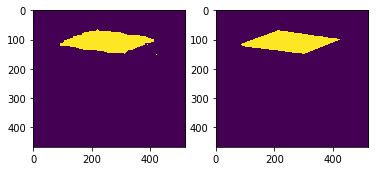

In [15]:
overlap_thresh = 0.001
idx = 0
for inst in instances:
    if inst.replace('jpg', 'png') in exist_segs:
        print('exist')
        continue
    name = inst
    #print(name)
    idx = idx+1
    if idx%10==0:
        print(idx, np.size(instances))
        
    mask =cv2.imread(path+'subTest/'+name)
    #print(path+'/'+name)
    #mask = cv2.imread(path+'/'+name)
    #plt.figure()
    #plt.imshow(mask)
    try:
        mask = mask[:,:,1]>=50
    except:
        print(name)
        continue
    #plt.figure()
    #plt.imshow(mask)
    r,g,b,realname = parsename(name)
    label = ClassifyColor(r,g,b)
    #print(gt+realname+'.png')
    gtimg = cv2.imread(gt+realname+'.png')
    #plt.figure()
    #plt.imshow(gtimg)
    #print(label)
    gt_part,gt_part_label = ParseMask(gtimg)
    max_overlap = -1
    max_overlap_id = -1
    for i in range(0,len(gt_part)):
        if gt_part_label[i]==label:
            #plt.figure()
            #plt.subplot(1,2,1)
            #plt.imshow(gt_part[i])
            #plt.subplot(1,2,2)
            #plt.imshow(mask)
            overlap = mask_overlap(mask,gt_part[i])
            if overlap > max_overlap:
                max_overlap = overlap
                max_overlapid = i
        #else:
            #print("wrong label")
    #print(max_overlap)
    if max_overlap>overlap_thresh:
        #print("found")
        find_gt = gt_part[max_overlapid][:]
        #plt.imshow(find_gt)
        find_gt[find_gt>=1] = label_dict[label]
        cv2.imwrite(path+'/seg/'+name[:name.index('.')]+'.png' ,find_gt)
#         binary_gt = find_gt[:]
#         binary_gt[binary_gt>=1] = 255
#         cv2.imwrite(path+'/1106_segv/'+name[:name.index('.')]+'.png' ,binary_gt)
    else:
        shutil.copy(path+'subTest/'+name,  path+'error/'+name)
        os.remove(path+'subTest/'+name)
        #print("error")
        #shutil.copy(path+'/'+name,  path+'/newerror/'+name)
        #os.remove(path+'/'+name)
print('Done!')

In [11]:
name

'cube_00857_10_0_255.jpg'

In [9]:
instances[1].replace('jpg', 'png')

'cylinder_01388_40_40_200.png'